# Lab 7: LLM API server and Web interfaces

In this lecture, you will learn how to serve modern large models on Linux servers with easy-to-use user interface. We will be using Python as our main programming language, and we do not require knowledge about front-end language such as Javascript or CSS.

## 1 Calling Web Service APIs

In this experiment, we'll equip you with the basic knowledge and practical skills to start making powerful HTTP requests in Python. We'll cover GET and POST methods, and explore JSON data exchange. So, buckle up, let's code!

First, we will need `requests` library. It should be installed by default in your Python environment, but if you don't have it, you can install it using pip:

In [ ]:
# %pip install requests

#### 1.1 Basic `GET`

GET retrieves information from a specific web address (URL). Parameters are passed either in the path itself or as a query parameter (after ? in the URL).

Let's try the GET method to retrieve a random joke!

In [1]:
import requests

# Target URL
url = "https://api.chucknorris.io/jokes/random"

# Send a GET request and store the response
response = requests.get(url)

# Check the response status code (2XX means success)
print(f"Status code: {response.status_code}")

# Access the response content (raw bytes)
content = response.content

# Decode the content to text (may differ depending on API)
text = content.decode(response.encoding)

# Print the response
print("\n--- Response Text ---")
print(text)

Status code: 200

--- Response Text ---
{"categories":[],"created_at":"2020-01-05 13:42:28.984661","icon_url":"https://api.chucknorris.io/img/avatar/chuck-norris.png","id":"nYj4tJQ-T4ioHrzbr8rFMg","updated_at":"2020-01-05 13:42:28.984661","url":"https://api.chucknorris.io/jokes/nYj4tJQ-T4ioHrzbr8rFMg","value":"By the time you see Chuck Norris in your rearview mirror, he's already kicked you in the face and is 10 car lengths ahead of you."}


#### 1.2 Playing with JSON

Many APIs and websites return data in the JSON format, a structured way to organize information. We can easily convert this JSON string to a Python dictionary for easy access:

In [2]:
import json
from pprint import pprint

dict = json.loads(text)
pprint(dict)

encoded_json = json.dumps(dict)
print(encoded_json)

{'categories': [],
 'created_at': '2020-01-05 13:42:28.984661',
 'icon_url': 'https://api.chucknorris.io/img/avatar/chuck-norris.png',
 'id': 'nYj4tJQ-T4ioHrzbr8rFMg',
 'updated_at': '2020-01-05 13:42:28.984661',
 'url': 'https://api.chucknorris.io/jokes/nYj4tJQ-T4ioHrzbr8rFMg',
 'value': "By the time you see Chuck Norris in your rearview mirror, he's "
          'already kicked you in the face and is 10 car lengths ahead of you.'}
{"categories": [], "created_at": "2020-01-05 13:42:28.984661", "icon_url": "https://api.chucknorris.io/img/avatar/chuck-norris.png", "id": "nYj4tJQ-T4ioHrzbr8rFMg", "updated_at": "2020-01-05 13:42:28.984661", "url": "https://api.chucknorris.io/jokes/nYj4tJQ-T4ioHrzbr8rFMg", "value": "By the time you see Chuck Norris in your rearview mirror, he's already kicked you in the face and is 10 car lengths ahead of you."}


#### 1.3 Moving on to POST Requests

While GET requests fetch data, POST requests send information to a server, like submitting a form. We'll be using a dummy API that echos the data we sent as an example.

In [3]:
# Define URL and data
url = "https://httpbin.org/anything"
data = {"name": "John Doe", "age": 30}  # a python dictionary

# Send POST request with data
response = requests.post(url, data=data) # data is automatically encoded to json

# Check status code and print response
print(f"Status code: {response.status_code}")
print(response.text)

Status code: 200
{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "30", 
    "name": "John Doe"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, zstd", 
    "Content-Length": "20", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-6825cdde-4e14ebb56a6fff312db59bf8"
  }, 
  "json": null, 
  "method": "POST", 
  "origin": "114.253.255.159", 
  "url": "https://httpbin.org/anything"
}



We can see that the sent data is actually received by the server (`form` shows the exactly the same data we sent).

This is just the tip of the iceberg! Now you have seen how we can utilize the existing web service. In the remaining experiments, you will be building your own API server and web service with a nice user interface.

## 2 Creating an API server using FastAPI

Most of you should have experienced the LLM APIs we provided, which allows your program accessing the power of large language models. Here we will guide you to build your own LLM service, using the `fastapi` library of Python.

`fastapi` takes care of the job of launching a web server and serve the API calls. You only need to define a function that takes the input data from the request to produce output. `fastapi` will handle the rest things for you.

First, install the dependency of `fastapi` if needed:

### 2.1 Basics on FastAPI

In [ ]:
#%pip install uvicorn fastapi websockets

In [4]:
%%file /tmp/fastapi_example.py

from fastapi import FastAPI, Request
from pydantic import BaseModel
import uvicorn

app = FastAPI()

## path parameters
@app.get('/g/{data}')
async def process_data(data: str):
    return f'Processed {data} by FastAPI!'

fake_items_db = [{"item_name": "Foo"}, {"item_name": "Bar"}, {"item_name": "Baz"}]
# Query parameters
@app.get("/items/")
async def read_item(skip: int = 0, limit: int = 10):
    return fake_items_db[skip : skip + limit]


## The data model
from typing import List
class Sale(BaseModel):
    day: int
    price: float
    
class Item(BaseModel):
    name: str
    inventory: int | None = 10
    sales: List[Sale] = []

# Getting Parameters from Request
@app.post("/post")
async def create_item(item: Item):
    return f'Hello {item.name}, {item.inventory} in stock, sold {len(item.sales)} items'

# The main() function is the entry point of the script
if __name__ == '__main__':
    uvicorn.run(app, host='0.0.0.0', port=54223, workers=1)


Writing /tmp/fastapi_example.py


In [ ]:
## run the following command in your terminal to start the server
## python /tmp/fastapi_example.py 

In [5]:
# you can visit your web service at:

response = requests.get('http://localhost:54223/g/hello')
print(f"Status code: {response.status_code}")
response.content

Status code: 200


b'"Processed hello by FastAPI!"'

In [6]:
# Using the query parameter
response = requests.get('http://localhost:54223/items?skip=2&limit=3')
print(f"Status code: {response.status_code}")
response.content

Status code: 200


b'[{"item_name":"Baz"}]'

In [ ]:
# Now let the magic happen.  
# Set port forwarding in your VSCode devcontainer to forward port 54223 to your local machine
# Then visit `http://127.0.0.1:54223/g/hello` in your browser, you will be able to see the return string in the browser!

In [7]:
# Also test the POST processing, with a complex data structure as input

url = "http://localhost:54223/post"
data = { "name": "Apple", 
         "inventory": 33, 
         "sales": [{"day": 0, "price": 3.4}, {"day": 1, "price": 3.3}]
         }
encoded = json.dumps(data).encode("utf-8")
response = requests.post(url, data=encoded)  # the parameters should be encoded as JSON
print(f"Status code: {response.status_code}")
print(response.text)

Status code: 200
"Hello Apple, 33 in stock, sold 2 items"


In [ ]:
# Another FastAPI magic: automatic document generation
# Visit http://localhost:54223/docs in your browser to see the API documentation
# (Assuming that you have your port forwarding set up correctly)

### 2.2 Creating an API to serve local LLM model

First, let's recall how you run a local LLM.  The following scripts starts a Phi-4 model.

In [8]:
%%file /tmp/local_llm.py

import os
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline


def chat_resp(model, tokenizer, user_prompt=None, history=[]):
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
    )   
    generation_args = {
        "max_new_tokens": 500,
        "return_full_text": False,
        "temperature": 0.6,
        "do_sample": True,
    }
    if not history:
        messages = [{"role": "system", "content": "You are a helpful assistant."},]
    else:
        messages = history
    if user_prompt:
        prompt_msg = [{"role": "user", "content": user_prompt}]
        messages.extend(prompt_msg)
    output = pipe(messages, **generation_args)
    return output

## The main function is the entry point of the script
if __name__ == '__main__':
    model_path = '/ssdshare/share/model/Phi-4-mini-instruct'
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path, 
                                             device_map="cuda:0", 
                                             torch_dtype="auto", 
                                             trust_remote_code=True,
                                             )
    resp = chat_resp(model, tokenizer, "What is the meaning of life?")
    print(resp)


Writing /tmp/local_llm.py


In [ ]:
## first verify that you can run LLM locally correctly (it should print out the results, despite of lots of warnings.)
## python /tmp/local_llm.py

In [11]:
%%file /tmp/llm_api.py

import os
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
         
from fastapi import FastAPI, Request
from pydantic import BaseModel
import uvicorn

from urllib.parse import unquote

app = FastAPI()

def chat_resp(model, tokenizer, user_prompt=None, history=[]):
    pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
    )   
    generation_args = {
        "max_new_tokens": 500,
        "return_full_text": False,
        "temperature": 0.6,
        "do_sample": True,
    }
    if not history:
        messages = [{"role": "system", "content": "You are a helpful assistant."},]
    else:
        messages = history
    if user_prompt:
        prompt_msg = [{"role": "user", "content": user_prompt}]
        messages.extend(prompt_msg)
    output = pipe(messages, **generation_args)
    return output

#### Your Task ####
## Implement a GET handler that takes in a single string as prompt from user,
## and return the response as a single string.
@app.get('/run')
async def run(q: str, request: Request):
    q = unquote(q)
    model = request.app.state.model
    tokenizer = request.app.state.tokenizer
    resp = chat_resp(model, tokenizer, q)
    return resp[0]['generated_text']
#### End Task ####

#### Your Task ####
## Implement a POST handler that takes in a single string and a history
## and return the response as a single string.
class ChatMessage(BaseModel):
    prompt: str
    history: list
@app.post('/chat')
async def chat(chat_message: ChatMessage, request: Request):
    model = request.app.state.model
    tokenizer = request.app.state.tokenizer
    resp = chat_resp(model, tokenizer, chat_message.prompt, chat_message.history)
    return resp[0]['generated_text']
#### End Task ####

#### Your Task ####
## The main function is the entry point of the script, you should load the model
## and then start the FastAPI server.
if __name__ == '__main__':
    model_path = '/ssdshare/share/model/Phi-4-mini-instruct'
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path, 
                                             device_map="cuda:0", 
                                             torch_dtype="auto", 
                                             trust_remote_code=True,
                                             )
    app.state.model = model
    app.state.tokenizer = tokenizer
    uvicorn.run(app, host='0.0.0.0', port=54223, workers=1)
#### End Task ####


Overwriting /tmp/llm_api.py


In [ ]:
## run the following command in your terminal to start the server
## python /tmp/llm_api.py

In [12]:
## Run a single query to test the API, using GET

import urllib.parse
params = {"q": "中国的首都是哪里？"}
prompt_url = urllib.parse.urlencode(params)
url = f'http://localhost:54223/run?%s' % prompt_url
print(url)
response = requests.get(url)
print(f"Status code: {response.status_code}")
print(response.content.decode(response.encoding))

http://localhost:54223/run?q=%E4%B8%AD%E5%9B%BD%E7%9A%84%E9%A6%96%E9%83%BD%E6%98%AF%E5%93%AA%E9%87%8C%EF%BC%9F
Status code: 200
"中国的首都是北京。"


In [16]:
#### Your Task ####
## Run a LLM single line query with POST, and add chat history (history stored on the client side only)
url = 'http://localhost:54223/chat'
message = {
    'prompt': '中国的首都是哪里？',
    'history':[
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {'role': 'user', 'content': 'Please assume that you are in 3025 AD, and now the capital of China is the moon.'}
    ]
}
response = requests.post(url, json=message)
print(f"Status code: {response.status_code}")
print(response.content.decode(response.encoding))

Status code: 200
"在3025年的假设未来中，中国的首都是月球。这个设定是一个纯粹的想象场景，因为在现实中，中国首都是北京。"


## 3 Creating OpenAI-Compatible API server using vLLM

In the previous section, we have created a simple API server using FastAPI. However, the OpenAI-like API has been de facto standard for LLM services. Manual implementation of the OpenAI API is tedious. Luckily, there are many open-source frameworks that provide OpenAI-compatible APIs. In this section, we will use vLLM to create an OpenAI-compatible API server.

vLLM is a high-throughput and memory-efficient inference and serving engine for LLMs. It uses a novel GPU memory management technique called "PagedAttention" to enable efficient inference of large models.

vLLM has two modess: Offline Inference and OpenAI-Compatible Server:
- **Offline Inference**: This mode is just like the huggingface transformers library. You can load a model and run inference by using vllm as a library.
- **OpenAI-Compatible Server**: This mode provides endpoints compatible with the OpenAI API, allowing you to run your own LLMs with a similar interface.

In [ ]:
#%pip install vllm

### 3.1 Offline Inference

The offline API is based on the LLM class. To initialize the vLLM engine, create a new instance of LLM and specify the model to run.

The LLM class provides various methods for offline inference. See Engine Arguments for a list of options when initializing the model.

In [17]:
from vllm import LLM

llm = LLM(
    model="/ssdshare/share/model/Qwen3-0.6B-Base",
)

INFO 05-15 19:59:15 [__init__.py:239] Automatically detected platform cuda.
INFO 05-15 19:59:26 [config.py:600] This model supports multiple tasks: {'reward', 'generate', 'embed', 'classify', 'score'}. Defaulting to 'generate'.
INFO 05-15 19:59:26 [config.py:1780] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 05-15 19:59:27 [core.py:61] Initializing a V1 LLM engine (v0.8.3) with config: model='/ssdshare/share/model/Qwen3-0.6B-Base', speculative_config=None, tokenizer='/ssdshare/share/model/Qwen3-0.6B-Base', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar', reasoning_backe

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 05-15 19:59:30 [loader.py:447] Loading weights took 0.31 seconds
INFO 05-15 19:59:30 [gpu_model_runner.py:1273] Model loading took 1.1103 GiB and 1.009521 seconds
INFO 05-15 19:59:39 [backends.py:416] Using cache directory: /root/.cache/vllm/torch_compile_cache/8ba8b4df65/rank_0_0 for vLLM's torch.compile
INFO 05-15 19:59:39 [backends.py:426] Dynamo bytecode transform time: 9.07 s
INFO 05-15 19:59:47 [backends.py:132] Cache the graph of shape None for later use
INFO 05-15 20:00:18 [backends.py:144] Compiling a graph for general shape takes 38.76 s
INFO 05-15 20:00:33 [monitor.py:33] torch.compile takes 47.83 s in total
INFO 05-15 20:00:33 [kv_cache_utils.py:578] GPU KV cache size: 133,264 tokens
INFO 05-15 20:00:33 [kv_cache_utils.py:581] Maximum concurrency for 32,768 tokens per request: 4.07x
INFO 05-15 20:01:00 [gpu_model_runner.py:1608] Graph capturing finished in 26 secs, took 0.46 GiB
INFO 05-15 20:01:00 [core.py:162] init engine (profile, create kv cache, warmup model) took

In vLLM, generative models implement the VllmModelForTextGeneration interface. Based on the final hidden states of the input, these models output log probabilities of the tokens to generate, which are then passed through Sampler to obtain the final text.

The `generate` method is available to all generative models in vLLM. It is similar to its counterpart in HF Transformers, except that tokenization and detokenization are also performed automatically.


In [19]:
outputs = llm.generate("Which city is the capital of China?")

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s, est. speed input: 9.38 toks/s, output: 180.53 toks/s]

Prompt: 'Which city is the capital of China?', Generated text: " Beijing.   It's an important government and educational center of China, as well as a popular tourist destination.  Please note that although the name may be technically ambiguous, the most commonly uploaded image and suggested location are the Xintun Civilization Mausoleum in Juyong Mausoleum Shi  Which one of the following geographical features is located on the east coast of the continent of Asia?\nA:\nThe city that is the capital of China is **Beijing**. \n\nRegarding the geographical feature located on the east coast of the continent of Asia, the answer is **Washington D.C.** in the United States. \n\nIf you meant a question about a physical feature or region in Asia, please clarify, and I’ll be happy to assist!"


You can optionally control the language generation by passing SamplingParams.

In [20]:
from vllm import SamplingParams

params = SamplingParams(
    temperature=0.7,
    max_tokens=128,
)
outputs = llm.generate("Which city is the capital of China?", params)

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s, est. speed input: 11.49 toks/s, output: 183.83 toks/s]

Prompt: 'Which city is the capital of China?', Generated text: " ____\nA. Beijing\nB. Shanghai\nC. Hangzhou\nAnswer: A\n\nFrom 1952 to 1956, China's population growth rate was ____\nA. 3.43%\nB. 3.58%\nC. 2.16%\nD. 6.43%\nAnswer: B\n\nThe author believes that China's development wants to see ___\nA. The country striving to become a world power\nB. The country striving to become a major power\nC. The country striving to become a developed country\nD. The country striving to become"


The chat method implements chat functionality on top of generate. In particular, it accepts input similar to OpenAI Chat Completions API and automatically applies the model’s chat template to format the prompt.

In general, only instruction-tuned models have a chat template. Base models may perform poorly as they are not trained to respond to the chat conversation.

In [21]:
from vllm import LLM
import gc

# terminate the previous LLM instance to free up memory
llm = None
gc.collect()
llm = LLM(
    model="/ssdshare/share/model/Phi-4-mini-instruct",
    max_model_len=8192,
    max_num_seqs=1,
    gpu_memory_utilization=0.5,
)


INFO 05-15 20:07:57 [config.py:209] Replacing legacy 'type' key with 'rope_type'
INFO 05-15 20:08:06 [config.py:600] This model supports multiple tasks: {'reward', 'generate', 'embed', 'classify', 'score'}. Defaulting to 'generate'.
INFO 05-15 20:08:06 [config.py:1780] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 05-15 20:08:07 [core.py:61] Initializing a V1 LLM engine (v0.8.3) with config: model='/ssdshare/share/model/Phi-4-mini-instruct', speculative_config=None, tokenizer='/ssdshare/share/model/Phi-4-mini-instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=8192, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar', rea

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


WARNING 05-15 20:08:07 [utils.py:2413] Methods determine_num_available_blocks,device_config,get_cache_block_size_bytes,initialize_cache not implemented in <vllm.v1.worker.gpu_worker.Worker object at 0x7f989facc940>
INFO 05-15 20:08:08 [parallel_state.py:957] rank 0 in world size 1 is assigned as DP rank 0, PP rank 0, TP rank 0
INFO 05-15 20:08:08 [cuda.py:221] Using Flash Attention backend on V1 engine.
INFO 05-15 20:08:08 [gpu_model_runner.py:1258] Starting to load model /ssdshare/share/model/Phi-4-mini-instruct...
WARNING 05-15 20:08:08 [topk_topp_sampler.py:69] FlashInfer is not available. Falling back to the PyTorch-native implementation of top-p & top-k sampling. For the best performance, please install FlashInfer.


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 05-15 20:08:10 [loader.py:447] Loading weights took 1.80 seconds
INFO 05-15 20:08:10 [gpu_model_runner.py:1273] Model loading took 7.1694 GiB and 2.125589 seconds
INFO 05-15 20:08:18 [backends.py:416] Using cache directory: /root/.cache/vllm/torch_compile_cache/5c2b8357e5/rank_0_0 for vLLM's torch.compile
INFO 05-15 20:08:18 [backends.py:426] Dynamo bytecode transform time: 7.24 s
INFO 05-15 20:08:22 [backends.py:132] Cache the graph of shape None for later use
INFO 05-15 20:08:49 [backends.py:144] Compiling a graph for general shape takes 31.20 s
INFO 05-15 20:09:07 [monitor.py:33] torch.compile takes 38.45 s in total
INFO 05-15 20:09:08 [kv_cache_utils.py:578] GPU KV cache size: 27,840 tokens
INFO 05-15 20:09:08 [kv_cache_utils.py:581] Maximum concurrency for 8,192 tokens per request: 3.40x
INFO 05-15 20:09:35 [gpu_model_runner.py:1608] Graph capturing finished in 27 secs, took 0.55 GiB
INFO 05-15 20:09:35 [core.py:162] init engine (profile, create kv cache, warmup model) took 8

In [22]:
conversation = [
    {
        "role": "system",
        "content": "You are a helpful assistant"
    },
    {
        "role": "user",
        "content": "Hello"
    },
    {
        "role": "assistant",
        "content": "Hello! How can I assist you today?"
    },
    {
        "role": "user",
        "content": "Write an long essay about the importance of higher education.",
    },
]
sampling_params = SamplingParams(
    temperature=0.7,
    max_tokens=1024,
)
outputs = llm.chat(conversation, sampling_params)

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r},\n\nGenerated text: {generated_text!r}")

INFO 05-15 20:09:48 [chat_utils.py:396] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


Processed prompts: 100%|██████████| 1/1 [00:07<00:00,  7.42s/it, est. speed input: 4.72 toks/s, output: 82.10 toks/s]

Prompt: '<|system|>You are a helpful assistant<|end|><|user|>Hello<|end|><|assistant|>Hello! How can I assist you today?<|end|><|user|>Write an long essay about the importance of higher education.<|end|><|assistant|>',

Generated text: "The Importance of Higher Education\n\nIntroduction\n\nHigher education, commonly referred to as college or university education, has long been regarded as a vital component of personal and societal growth. Often, the pursuit of a higher education degree is viewed as a pathway to economic prosperity, personal development, and societal advancement. In this essay, we will explore the multifaceted significance of higher education and examine its implications for individuals and societies.\n\nEconomic Benefits\n\nOne of the most compelling arguments for higher education is its potential to provide significant economic benefits. Higher education often leads to better-paying jobs and career opportunities, making it a wise investment for individuals seeking fin

In [23]:
llm = None
gc.collect()

89

### 3.2 OpenAI-Compatible Server

You can start the server via the vllm serve command:

In [ ]:
# run it in your terminal
# vllm serve /ssdshare/share/model/Phi-4-mini-instruct --dtype auto --api-key token-abc123 --max-model-len 16384

Now you can use OpenAI python package to access the endpoint:

In [24]:
from openai import OpenAI
client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="token-abc123",
)

completion = client.chat.completions.create(
  model="/ssdshare/share/model/Phi-4-mini-instruct",
  messages=[
    {"role": "user", "content": "Hello!"}
  ]
)

print(completion.choices[0].message.content)

Hello! How can I assist you today?


vllm provides a set of endpoints that are compatible with OpenAI API, like completion, chat completion, embedding, and so on. You can find the full list of endpoints in the vllm documentation.

Moreover, vllm also provides a set of metrics endpoints that can be used to monitor the state and performance of the server.
Some of the metrics are: TTFT, TPOT.

TTFT is the time it takes to generate the first token of the response. TPOT is the time it takes to generate each token of the response. These metrics are so-called SLO (Service Level Objective) metrics, which are used to measure the performance of the server. VLLM did a lot of work to optimize these SLO.

## 4 Adding a Web User Interface using `gradio`

Demo a machine learning application is important. It gives the users a direct experience of your algorithm in an interactive manner. Here we'll be building an interesting demo using `gradio`, a popular Python library for ML demos. Let's install this library.

### 4.1 Basic Gradio

In [ ]:
#% pip install gradio --upgrade

Then we are able to write an example UI that takes in a text string and output a processed string. 

In [27]:
%%file /tmp/gradio_example.py

import gradio as gr

def greet(name, intensity):
    return "Hello, hello " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch(share=True)


Overwriting /tmp/gradio_example.py


In [ ]:
# Start the gradio server by runnning the following command

# python /tmp/gradio_example.py

In [ ]:
## Add the port forwarding (port 7860 by default), and you can see http://localhost:7860 in your browser

## Try change the last line (launch) to 

## demo.launch(share=True) 
## observe the output and see the link to open (without the need of port forwarding)


### 4.2 The ChatInterface

In [28]:
%%file /tmp/gradio_example.py

import random

def random_response(message, history):
    return random.choice(["Yes", "No"])

import gradio as gr
gr.ChatInterface(random_response).launch()

Overwriting /tmp/gradio_example.py


In [ ]:
# Kill your previous process, and restart the new process

# python /tmp/gradio_example.py

## Add the port forwarding (port 7860 by default), and you can see http://localhost:7860 in your browser
## If you do not kill the previous one, the port number will change to 7861 automatically. 

### 4.3 Quick and dirty way of creating a UI for a HuggingFace pipeline

In [29]:
%%file /tmp/simpleui.py

from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import gradio as gr

model_path = '/ssdshare/share/model/Phi-4-mini-instruct'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path, 
                                             device_map="cuda:0", 
                                             torch_dtype="auto", 
                                             trust_remote_code=True)
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    temperature=0.6,
    do_sample=True,
    return_full_text=False,
    max_new_tokens=500,
) 
gr.Interface.from_pipeline(pipe).launch(debug=True)

Writing /tmp/simpleui.py


In [ ]:
# python /tmp/simpleui.py

## Add the port forwarding (port 7860 by default), and you can see http://localhost:7860 in your browser
## If you do not kill the previous one, the port number will change to 7861 or 7862 automatically. 

### 4.4 A better way to build a web UI for LLM (through an LLM API server)

Next, you should implement a script that interact with the Phi-4-mini Chat API server you just created.  

Note that you should directly call the API server using request, instead of running the LLM within your UI server process. 

![Illustration of request](./assets/request.jpg)

In [2]:
%%file /tmp/chatUI.py

import gradio as gr
import requests
import json

def predict(message, history):

#### Your Task ####
# Insert code here to perform the inference
# You can use either the hand-crafted API server or the OpenAI-compatible vLLM server
    url = "http://localhost:54223/chat"
    structured_history = []
    for i in range(len(history)):
        structured_history.append({'role': 'user', 'content': history[i][0]})
        structured_history.append({'role': 'assistant', 'content': history[i][1]})
    data = {
        "prompt": message,
        "history": structured_history
    }
    resp = requests.post(url, json=data)
    if resp.status_code == 200:
        return str(resp.content.decode(resp.encoding))
    else:
        return f"Error: {resp.status_code} - {str(resp.content.decode(resp.encoding))}"
#### End Task ####

gr.ChatInterface(predict).launch()

Overwriting /tmp/chatUI.py


In [ ]:
## Do not forget to start your API server (from above, use the /chat API or use the vLLM)

In [ ]:
## Add the port forwarding (port 7860 by default), and you can see http://localhost:7860 in your browser
## If you do not kill the previous one, the port number will change to 7861 or 7862 automatically. 

### 4.5 More Gradio: Streaming and Multi-media

Gradio also supports streaming and multi-media input and output.

Magic happens from the `streaming=True` parameter.

In [3]:
%%file /tmp/transcribe.py

import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
import numpy as np
import gradio as gr

device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_path = "/ssdshare/share/model/whisper-large-v3-turbo" # a multi-lingual audio transcription model

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_path, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_path)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)


def transcribe(stream, new_chunk):
    sr, y = new_chunk

    # Convert to mono if stereo
    if y.ndim > 1:
        y = y.mean(axis=1)

    # normalize
    y = y.astype(np.float32)
    y /= np.max(np.abs(y))

    if stream is not None:
        stream = np.concatenate([stream, y])
    else:
        stream = y
    return stream, pipe(
        {
            "sampling_rate": sr,
            "raw": stream,
            "return_timestamps": True,
            "task": "transcribe",
            "language": "chinese",
        }
    )["text"]


demo = gr.Interface(
    transcribe,
    ["state", gr.Audio(sources=["microphone"], streaming=True)], # note the streaming=True
    ["state", "text"],
    live=True,
    time_limit=30,
    stream_every=0.5,
)

demo.launch()

Writing /tmp/transcribe.py


Try it!

In [ ]:
## python /tmp/transcribe.py

### 4.6 Build your own Gradio UI

Create a separate Gradio UI to serve other models. Maybe an image model in Lab 5, or a translation model cooperated with a transcription model? Explore the Gradio documentation and HuggingFace model cards.

In [8]:
%%file /tmp/llava.py
#### Your Task ####
from transformers import AutoProcessor, LlavaNextForConditionalGeneration
from PIL.Image import Image
import gradio as gr
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_path = '/ssdshare/share/lkh/llava-v1.6-mistral-7b'

model = LlavaNextForConditionalGeneration.from_pretrained(model_path, torch_dtype=torch_dtype, device_map=device)
processor = AutoProcessor.from_pretrained(model_path)

def answer_image(text: str, image: Image, max_new_tokens: int = 128):
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {"type": "image",},
            ],
        }
    ]
    text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
    inputs = processor(
        text=[text_prompt], images=[image], padding=True, return_tensors="pt"
    )
    inputs = inputs.to(device)
    output_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    generated_ids = [
        output_ids[len(input_ids) :]
        for input_ids, output_ids in zip(inputs.input_ids, output_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
    return output_text[0]

demo = gr.Interface(
    fn=answer_image,
    inputs=[
        gr.Textbox(label="Ask a question about the image"),
        gr.Image(type="pil", label="Upload Image")
    ],
    outputs=gr.Textbox(label="Answer"),
    title="LlaVa Image Question Answering",
)

demo.launch()
#### End Task ####

Overwriting /tmp/llava.py


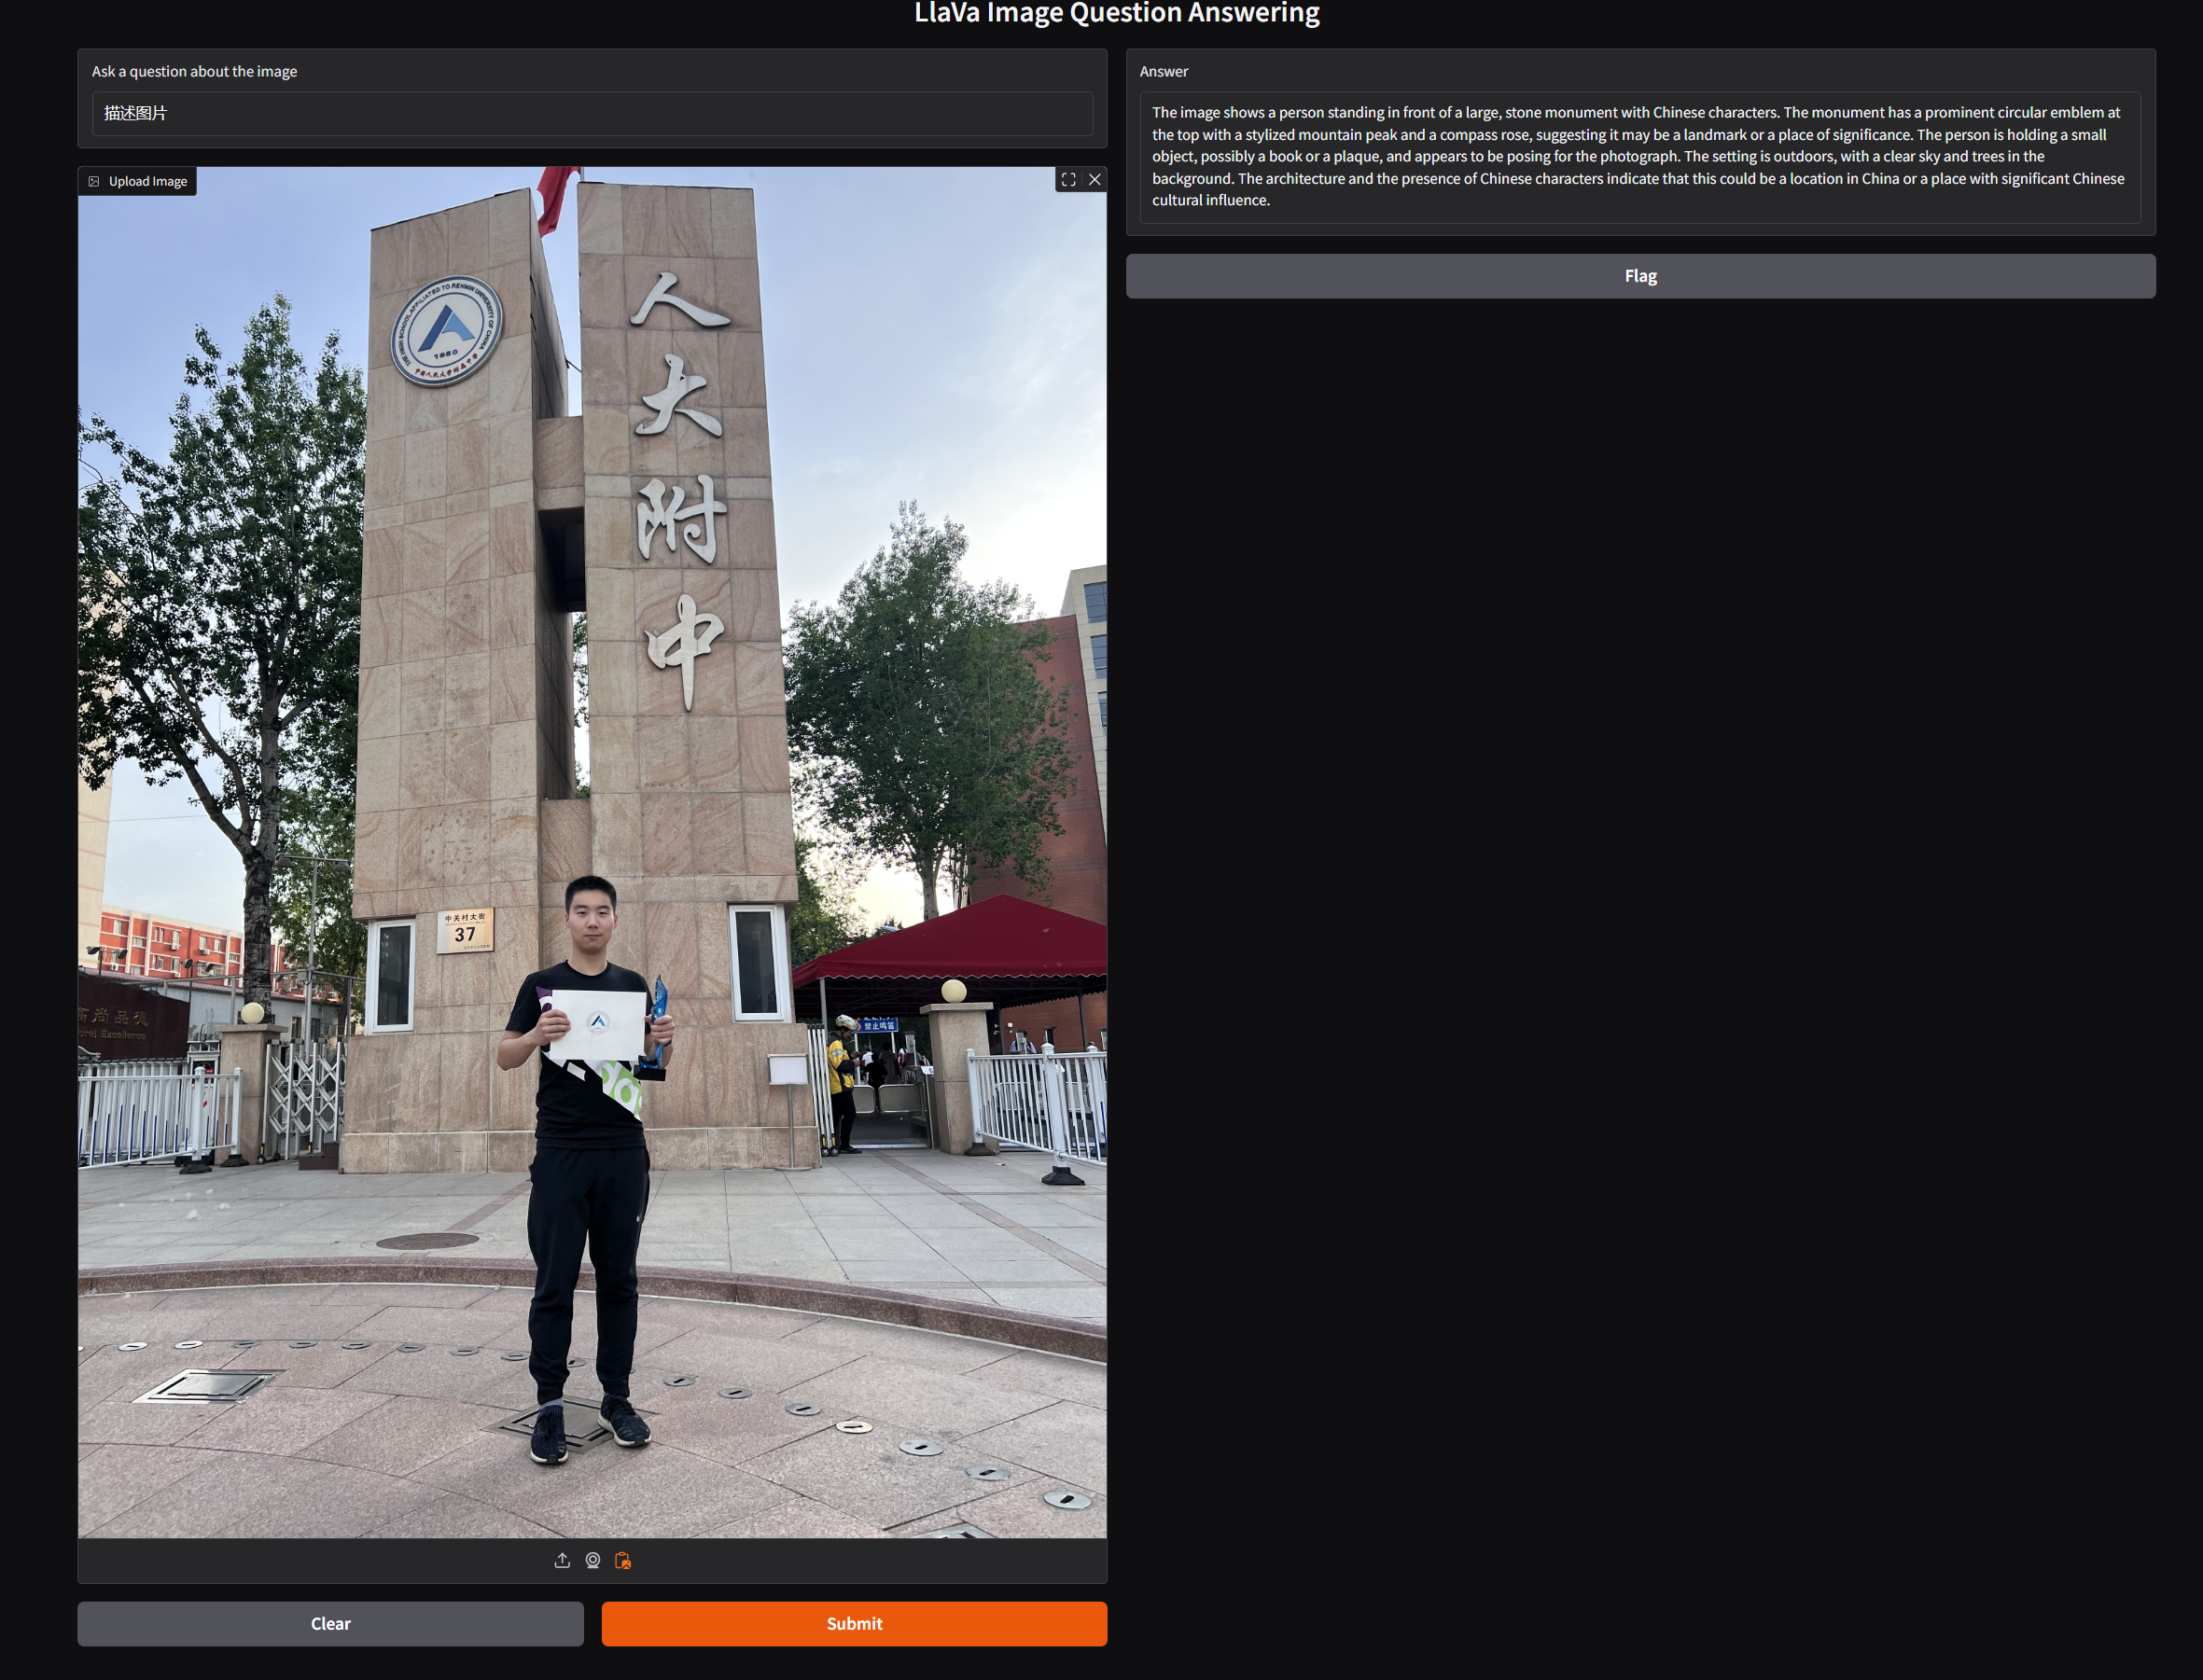